# Chapter 3, demo 5

Bayesian Data Analysis, 3rd ed

Demonstrate a normal model for the Newcomb's data (BDA3 p. 66).

In [1]:
import os
import numpy as np

import matplotlib.pyplot as plt
import preliz as pz
pz.style.use('preliz-doc')

In [2]:
# data
data_path = os.path.abspath(
    os.path.join(
        os.path.pardir,
        'utilities_and_data',
        'light.txt'
    )
)
y = np.loadtxt(data_path)
# sufficient statistics
n = len(y)
s2 = np.var(y, ddof=1)  # ddof=1 -> sample estimate
my = np.mean(y)

# filtered data
y_pos = y[y > 0]
# sufficient statistics
n_pos = len(y_pos)
s2_pos = np.var(y_pos, ddof=1)
my_pos = np.mean(y_pos)

In [3]:
# for mu, compute the density in these points
tl1 = [10, 40]
t1 = np.linspace(tl1[0], tl1[1], 500)

# compute the exact marginal density for mu
pm_mu = pz.StudentT(n-1, my, np.sqrt(s2/n)).pdf(t1)

# compute the exact marginal density for mu for the filtered data
pm_mu_pos = (
    pz.StudentT(n_pos-1, my_pos, np.sqrt(s2_pos/n_pos)).pdf(t1)
)

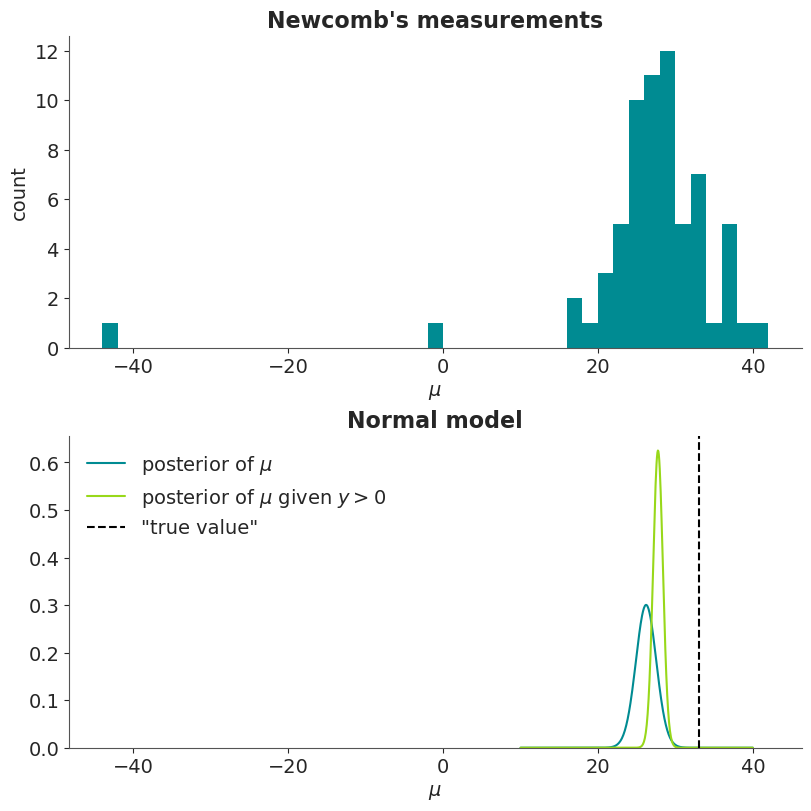

In [4]:
# create figure
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(8, 8))

# plot histogram
ax = axes[0]
ax.hist(y, np.arange(-44, 43, 2))
# decorate
ax.set_title('Newcomb\'s measurements')
ax.set_ylabel('count')
ax.set_xlabel(r'$\mu$')
ax.tick_params(axis='x', reset=True, top=False)

# plot the posterior of mu
ax = axes[1]
ax.plot(t1, pm_mu)
# plot the posterior of mu in the filtered case
ax.plot(t1, pm_mu_pos)
# Plot the currently accepted true value
ax.axvline(33, color='k', linestyle='--')
ax.legend(
    (r'posterior of $\mu$',
     r'posterior of $\mu$ given $y > 0$',
     '"true value"'),
    loc='upper left'
)
ax.set_title('Normal model')
ax.set_xlabel(r'$\mu$')
#ax.set_yticks(())
# set bottom to zero
ax.set_ylim((0, ax.set_ylim()[1]));